## Task-D: Collinear features and their effect on linear models

In [11]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('task_d.csv')

In [29]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [30]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

__________

### TASK 1. LOGISTIC REGRESSION.


1. <b>Finding the Correlation between the features</b>

    a. check the correlation between the features
    
    b. plot heat map of correlation matrix using seaborn heatmap

In [33]:
X_df = data.drop(['target'], axis=1)
covariance = pd.DataFrame(X_df.cov())

'\nspearman_cov = data.corr(method=\'spearman\')\nplt.figure(figsize=(12,8))\nsns.heatmap(spearman_cov, annot=True, fmt="f", cmap="YlGnBu")\nplt.plot()\n'

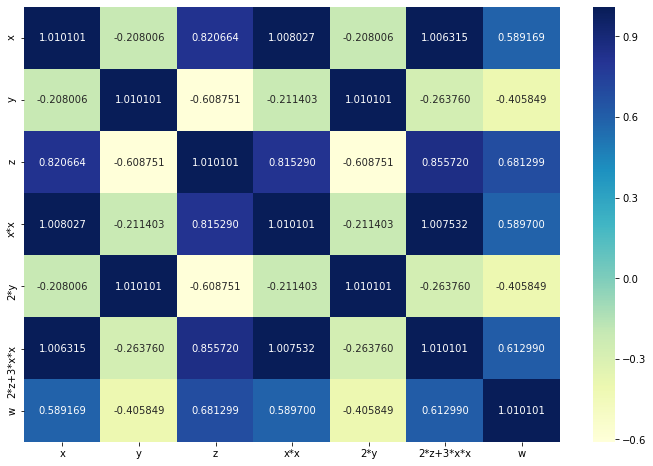

In [65]:
plt.figure(figsize=(12,8))
sns.heatmap(covariance, annot=True, fmt="f", cmap="YlGnBu")
plt.plot()


'''
spearman_cov = data.corr(method='spearman')
plt.figure(figsize=(12,8))
sns.heatmap(spearman_cov, annot=True, fmt="f", cmap="YlGnBu")
plt.plot()
'''

2. <b>Finding the best model for the given data</b>

    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, stratify = Y)


lr = LogisticRegression()


alphas = np.logspace(-2,3,10, endpoint=True, dtype='float')
param_grid = {'penalty':['l1','l2'],
              'C': np.logspace(-2,3,10, endpoint=True, dtype='float')
             }

clf = GridSearchCV(lr, param_grid=param_grid, cv=3)

clf.fit(X_train,y_train)


print("Best Parameters Are: ",clf.best_params_)

Best Parameters Are:  {'C': 0.03593813663804628, 'penalty': 'l2'}


In [67]:
best_model = clf.best_estimator_
best_model

LogisticRegression(C=0.03593813663804628)

3. <b>Getting the weights with the original data</b>

    a. train the 'best_model' with X, Y
    
    b. Check the accuracy of the model 'best_model_accuracy'
    
    c. Get the weights W using best_model.coef_

In [68]:
best_model.fit(X_train,y_train)

y_pred = best_model.predict(X_test)

best_model_accuracy = metrics.accuracy_score(y_test, y_pred)
best_model_accuracy

1.0

In [69]:
weights = best_model.coef_
weights

array([[ 0.25141997, -0.31088651,  0.40387112,  0.24372977, -0.31088651,
         0.26811928,  0.21457786]])

4. <b>Modifying original data</b>

    a. Add a noise(order of 10^-2) to each element of X 
and get the new data set X' (X' = X + e)
    
    b. Train the same 'best_model' with data (X', Y)
    
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    
    d. Get the weights W' using best_model.coef_

In [70]:
err = np.random.uniform(0.01, 0.099)

X_dash = X + err
X_train, X_test, y_train, y_test = train_test_split(X_dash, Y, test_size = 0.33, stratify = Y)


best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

In [71]:
best_model_accuracy_edited = metrics.accuracy_score(y_test, y_pred)
best_model_accuracy_edited

1.0

In [72]:
weights_edited = best_model.coef_
weights_edited

array([[ 0.25906313, -0.30290895,  0.42063307,  0.25242117, -0.30290895,
         0.27796531,  0.20266497]])

5. <b> Checking deviations in metric and weights </b>

      a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
      
      b. find the absolute change between each value of W and W' ==> |(W-W')|
      
      c. print the top 4 features which have higher % change in weights 
    compare to the other feature

In [73]:
best_model_accuracy_edited - best_model_accuracy

0.0

In [74]:
weight_change = weights - weights_edited

In [75]:
import math
def absolute_val(vector):
    for i in vector:
        sq_sum = 0
        for j in i:
            sq_value = math.pow(j,2)
            sq_sum += sq_value
        abs_val = math.sqrt(sq_sum)
    return abs_val


In [76]:
absolute_val(weight_change)

0.02794755165503969

In [77]:
features = data.drop('target', axis = 1)
features_names = features.columns
features_names = pd.DataFrame(features_names)


In [78]:
features = data.drop('target', axis = 1)
features_names = pd.DataFrame(features.columns)

weights_df = pd.DataFrame(weights).T
weights_df['weights_edited'] = pd.DataFrame(weights_edited).T
weights_df.columns = ['weights', 'weights_edited']
weights_df['change'] = np.round((weights_df.weights - weights_df.weights_edited), 6)
weights_df['%change'] = np.round(((weights_df.weights - weights_df.weights_edited)/weights_df.weights)*100, 6)
weights_df = pd.merge(weights_df, features_names, left_index=True, right_index=True)
weights_df.columns = ['weights', 'weights_edited', 'change', '%change', 'feature']

weights_df['Rank'] = weights_df['%change'].rank(ascending=True)
weights_df = weights_df[['feature', 'weights','weights_edited','change','%change','Rank']]
weights_df

,feature,weights,weights_edited,change,%change,Rank
0,x,0.251420,0.259063,-0.007643,-3.039998,4.0
1,y,-0.310887,-0.302909,-0.007978,2.566070,5.5
2,z,0.403871,0.420633,-0.016762,-4.150322,1.0
3,x*x,0.243730,0.252421,-0.008691,-3.565998,3.0
4,2*y,-0.310887,-0.302909,-0.007978,2.566070,5.5
5,2*z+3*x*x,0.268119,0.277965,-0.009846,-3.672257,2.0
6,w,0.214578,0.202665,0.011913,5.551778,7.0


Top features with highrst percentege change are:

In [49]:
top_features = weights_df.nlargest(4, 'Rank')
top_features

,feature,weights,weights_edited,change,%change,Rank
3,x*x,0.145937,0.138740,0.007197,4.931467,7.0
0,x,0.147764,0.140835,0.006929,4.689193,6.0
5,2*z+3*x*x,0.155488,0.148769,0.006719,4.321027,5.0
2,z,0.199976,0.197976,0.002000,1.000136,4.0


In [50]:
print("Top features with highest percentege change are: {}".format(list(top_features.feature)))

Top features with highest percentege change are: ['x*x', 'x', '2*z+3*x*x', 'z']


### OBSERVATIONS:

- From Covariance Matrix, it can be observed that some of the features are highly corelated as their corelation value is high. Example (y & 2y), (z, 2*z+3*x*x) (X*X, X) etc.

- After performing perbutation test top features with highest percentege change are: ['x*x', 'x', '2*z+3*x*x', 'z']. Which indicates that these features are collinear/multilinear. 

- As we can expressed these features in terms of other in linear fashion i.e. we can establish linear relationship between these features. E.g. X*X is a square of X, their weights can be arbitarily changed hence we cannot used their weights directly as a feature inportance, therefore other methods such as "Forward Selection Method" can be recommendated in order to decide feature importance.

 

_____________

**Task: 2 Linear SVM**
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.

In [51]:
from sklearn.svm import SVC

clf_svm = SVC(kernel='linear')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, stratify = Y)


clf_svm = SVC(kernel='linear')


alphas = np.logspace(-2,3,10, endpoint=True, dtype='float')
param_grid = {'C': np.logspace(-2,3,10, endpoint=True, dtype='float')}

clf = GridSearchCV(clf_svm, param_grid=param_grid, cv=3)
clf.fit(X_train,y_train)

clf.best_params_

print("Best Parameters Are: ",clf.best_params_)

Best Parameters Are:  {'C': 0.01}


In [53]:
best_model = clf.best_estimator_
best_model

SVC(C=0.01, kernel='linear')

In [54]:
best_model.fit(X_train,y_train)

y_pred = best_model.predict(X_test)

best_model_accuracy = metrics.accuracy_score(y_test, y_pred)
best_model_accuracy

1.0

In [55]:
weights = best_model.coef_
weights

array([[ 0.16146101, -0.20573303,  0.32174795,  0.15223195, -0.20573303,
         0.1758555 ,  0.1151547 ]])

In [56]:
err = np.random.uniform(0.01, 0.099)

X_dash = X + err
X_train, X_test, y_train, y_test = train_test_split(X_dash, Y, test_size = 0.33, stratify = Y)


best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

In [57]:
best_model_accuracy_edited = metrics.accuracy_score(y_test, y_pred)
best_model_accuracy_edited

1.0

In [58]:
weights_edited = best_model.coef_
weights_edited

array([[ 0.16073594, -0.19641163,  0.31423158,  0.15059397, -0.19641163,
         0.17347383,  0.14159515]])

In [59]:
best_model_accuracy_edited - best_model_accuracy

0.0

In [60]:
weight_change = weights - weights_edited

In [61]:
absolute_val(weight_change)

0.030630891044908456

In [62]:
features = data.drop('target', axis = 1)
features_names = pd.DataFrame(features.columns)

weights_df = pd.DataFrame(weights).T
weights_df['weights_edited'] = pd.DataFrame(weights_edited).T
weights_df.columns = ['weights', 'weights_edited']
weights_df['change'] = np.round((weights_df.weights - weights_df.weights_edited), 6)
weights_df['%change'] = np.round(((weights_df.weights - weights_df.weights_edited)/weights_df.weights)*100, 6)
weights_df = pd.merge(weights_df, features_names, left_index=True, right_index=True)
weights_df.columns = ['weights', 'weights_edited', 'change', '%change', 'feature']

weights_df['Rank'] = weights_df['%change'].rank(ascending=True)
weights_df = weights_df[['feature', 'weights','weights_edited','change','%change','Rank']]
weights_df

,feature,weights,weights_edited,change,%change,Rank
0,x,0.161461,0.160736,0.000725,0.449068,2.0
1,y,-0.205733,-0.196412,-0.009321,4.530824,6.5
2,z,0.321748,0.314232,0.007516,2.336107,5.0
3,x*x,0.152232,0.150594,0.001638,1.075977,3.0
4,2*y,-0.205733,-0.196412,-0.009321,4.530824,6.5
5,2*z+3*x*x,0.175855,0.173474,0.002382,1.354332,4.0
6,w,0.115155,0.141595,-0.026440,-22.960810,1.0


In [63]:
top_features = weights_df.nlargest(4, 'Rank')
top_features

,feature,weights,weights_edited,change,%change,Rank
1,y,-0.205733,-0.196412,-0.009321,4.530824,6.5
4,2*y,-0.205733,-0.196412,-0.009321,4.530824,6.5
2,z,0.321748,0.314232,0.007516,2.336107,5.0
5,2*z+3*x*x,0.175855,0.173474,0.002382,1.354332,4.0


In [64]:
print("Top features with highest percentege change are: {}".format(list(top_features.feature)))

Top features with highest percentege change are: ['y', '2*y', 'z', '2*z+3*x*x']


### OBSERVATIONS:

- From Covariance Matrix, it can be observed that some of the features are highly corelated as their corelation value is high. Example (y & 2y), (z, 2*z+3*x*x) (X*X, X) etc.

- After performing perbutation test top features with highest percentege change are: ['y', '2*y', 'z', '2*z+3*x*x']. Which indicates that these features are collinear/multilinear. 

- As we can expressed these features in terms of other in linear fashion i.e. we can establish linear relationship between these features. E.g. X*X is a square of X, their weights can be arbitarily changed hence we cannot used their weights directly as a feature inportance, therefore other methods such as "Forward Selection Method" can be recommendated in order to decide feature importance.

 

____________